In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

import os
import pandas as pd
from IPython.display import Image

In [ ]:
def traverseDir(curdir):
    global files, sizes, names
    
    for item in os.listdir(curdir):
        full = curdir + "/" + item
        if(os.path.isdir(full)):
            traverseDir(full)
        
        if(item.lower().endswith('jpg') or item.lower().endswith('jpeg')):
            files.append(full)
            sizes.append(os.stat(full).st_size)
            names.append(item)

In [ ]:
# curdir = "/media/sf_H_DRIVE/nm2018/church"
curdir = "/media/sf_H_DRIVE/Lauren"
# curdir = "/media/sf_H_DRIVE/Pictures"
# curdir = "/media/sf_H_DRIVE"

files, sizes, names = [], [], []
traverseDir(curdir)
    
df = pd.DataFrame({'full':files, 'size': sizes, 'names': names  })
df.size

In [ ]:
df1 = df.groupby(['names','size']).first()
df1['unique'] = 1
df2 = df.merge(df1, left_on='full', right_on='full', how='left')
df2.unique.value_counts(dropna=False)

In [ ]:
## careful: deletes files!
for index, row in df2[df2.unique.isnull()].iterrows():
    print('deleting {}'.format(row['full']))
#     os.remove(row['full'])

/media/sf_H_DRIVE/Lauren/My Documents/Downloads/caro102.jpg


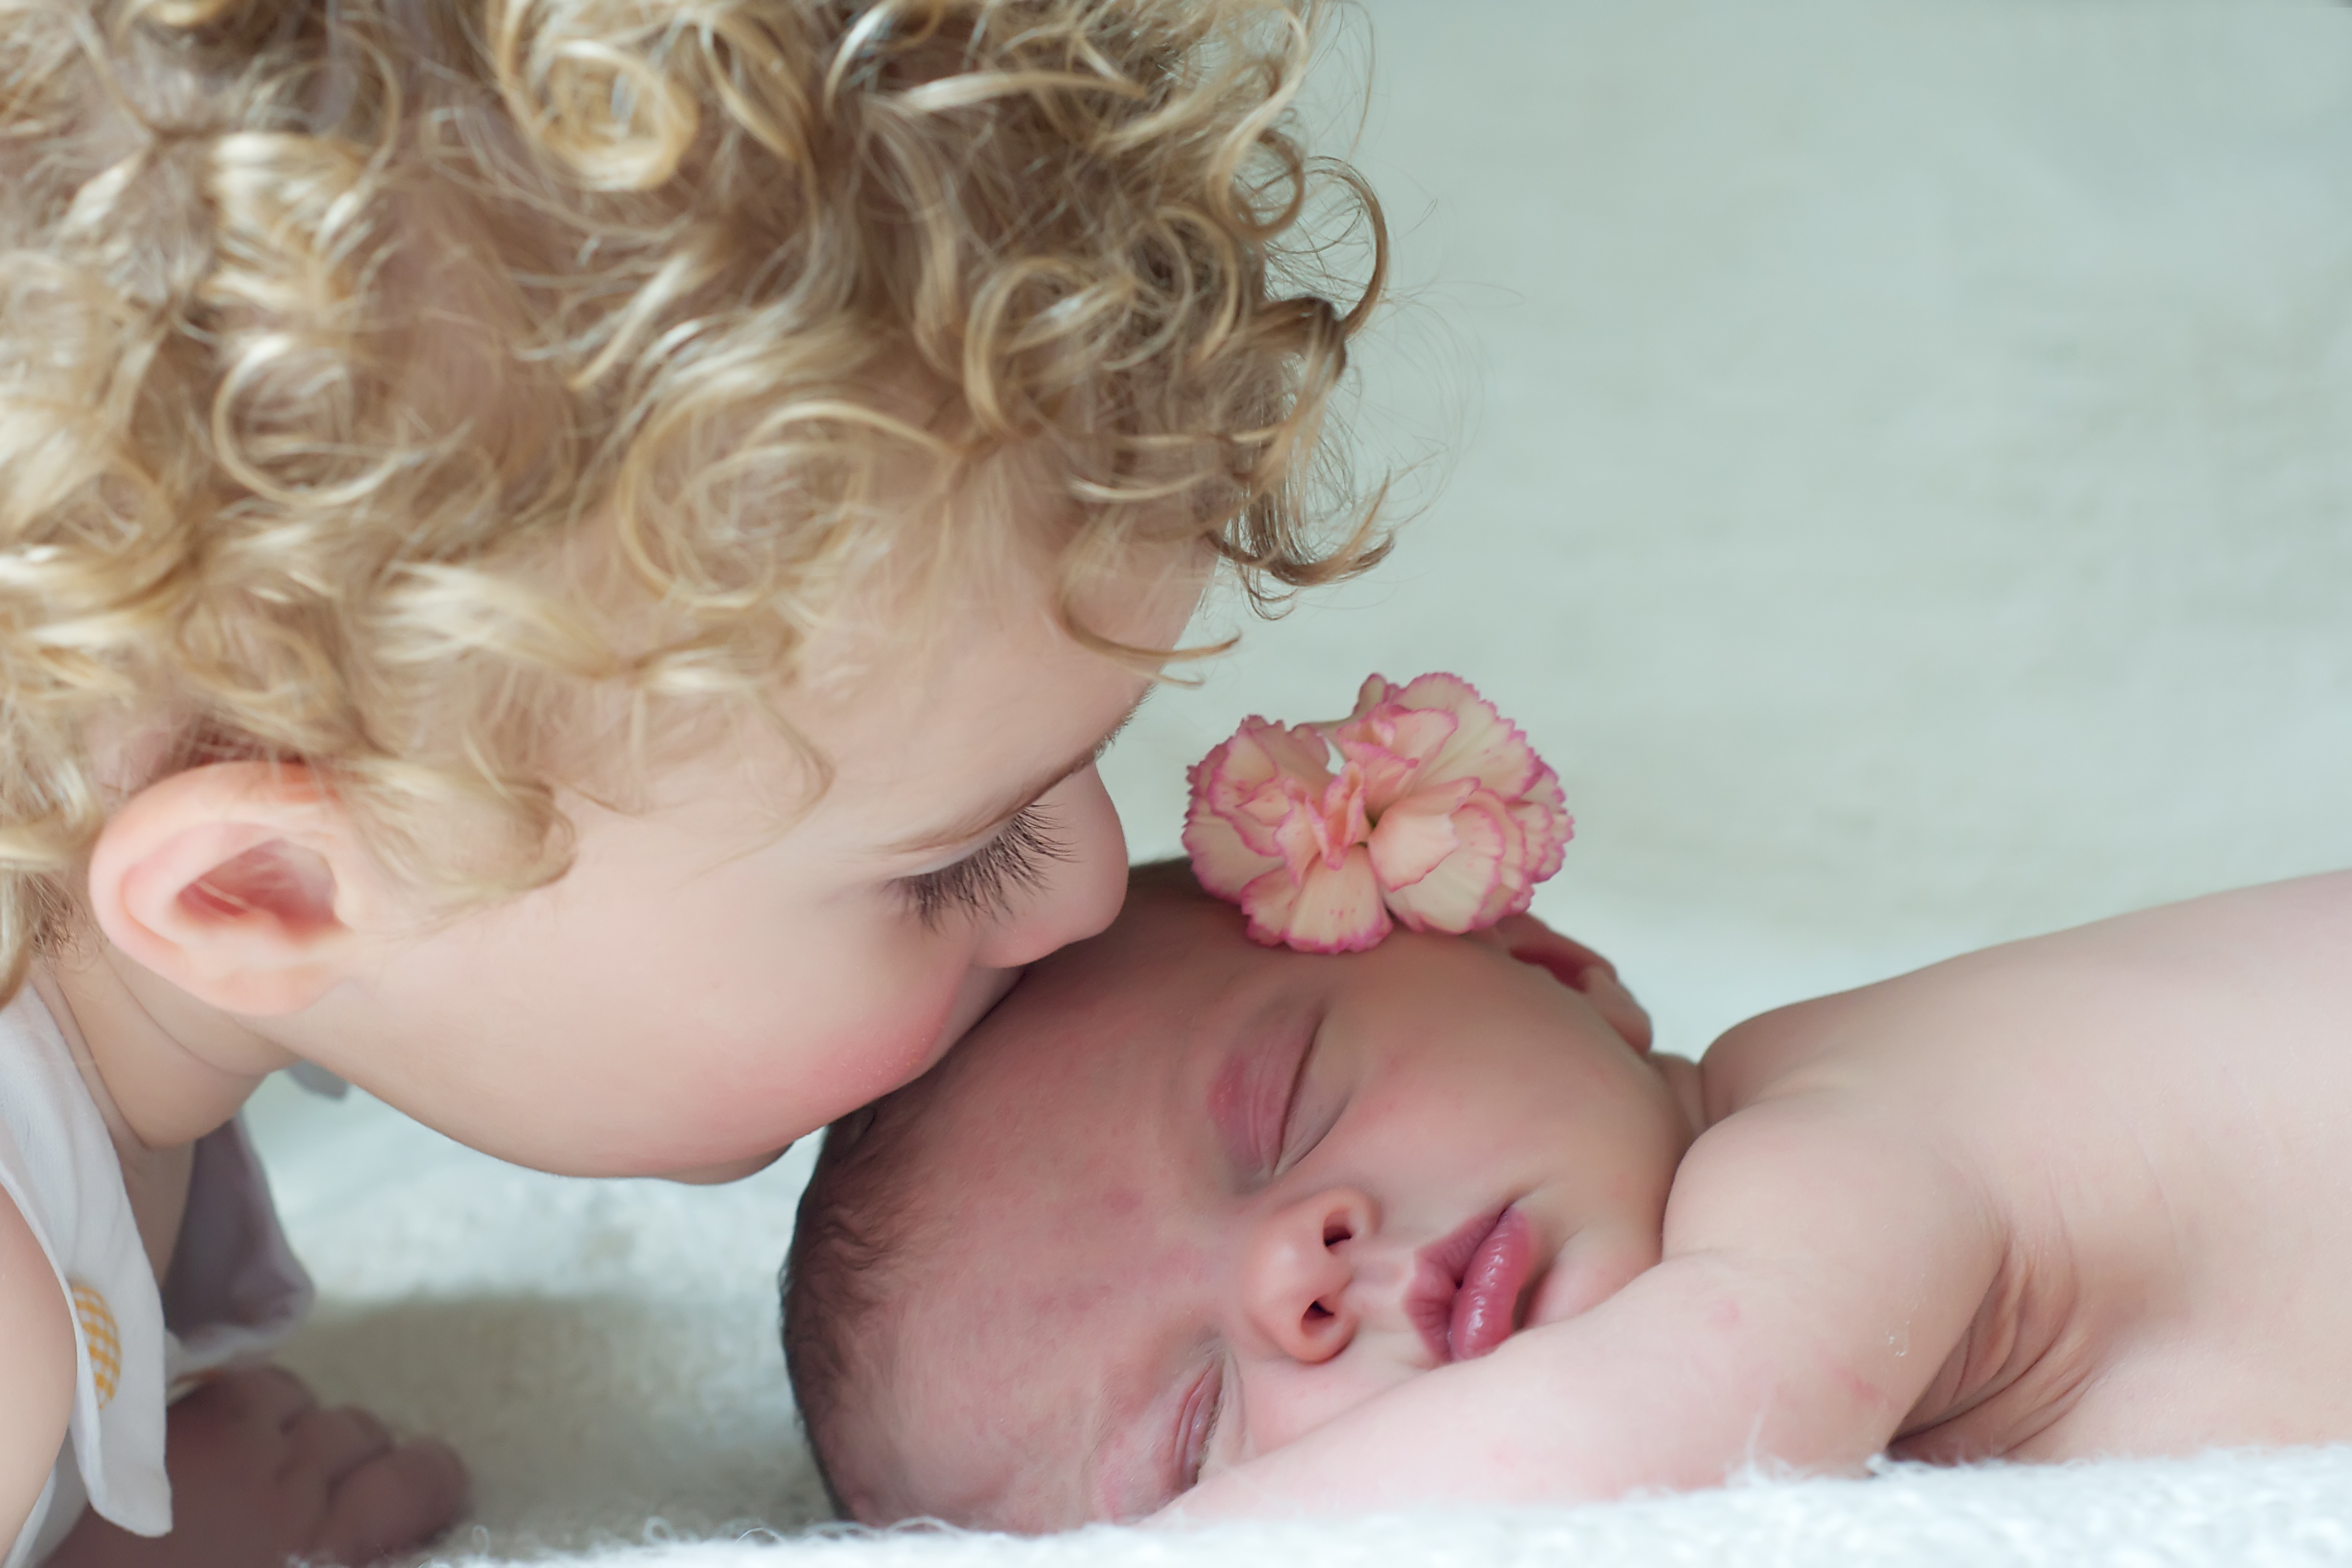

In [96]:
#examine files to delete
for index, row in df.iterrows():
    if(row['names']=='caro102.jpg'):
        print(row['full'])
        Image(row['full'])